In [1]:
%matplotlib inline

In [2]:
import numpy as np

In [3]:
from vizztf import ZTFSNViz

In [4]:
from sqlalchemy import create_engine

In [5]:
import pandas as pd
import numpy as np

In [6]:
import sncosmo
import logging
logger = logging.getLogger('ztf')
logger.setLevel(logging.INFO)
#logging.basicConfig(level=logging.DEBUG, filename='images_test.log')

In [7]:
# Read cadences:
def read_cadence(fname='/Users/rbiswas/Downloads/test_schedule_v3.db'):
    """read the output of a observing strategy simulation into a dataframe
    
    Paramameters
    ------------
    fname : str, optional
        absolute path to the observing stratgy simulation
    """
    fname = 'sqlite:///' + fname
    engine = create_engine(fname)
    df = pd.read_sql_table('Summary', con=engine)
    df.obsHistID = df.obsHistID.astype(np.int)
    df.set_index('obsHistID', inplace=True)
    df.expMJD = df.expMJD + 365 * 2 # ZTF is not done
    return df

In [8]:
def read_sim(fname='/Users/rbiswas/Downloads/sn_coord_time.dat'):
    df = pd.read_csv(fname,
                     skiprows=1, delim_whitespace=True,
                     names=('z', 'ra', 'dec', 't0'))
    #df.ra = df.ra * 360./24.0 - 180.
    df.t0 = df.t0 - 2400000.5
    return df
#df.groupby(['night']).sessionID.count().hist(histtype='step')
simsdf = read_sim()

In [9]:
simsdf = read_sim()

In [10]:
simsdf.head()

,z,ra,dec,t0
0,0.150856,177.009298,-9.541729,58158.737911
1,0.193961,-142.895644,-16.445698,58171.555313
2,0.185266,104.668543,5.147820,58304.201365
3,0.101136,93.239688,81.126166,58232.383343
4,0.137615,39.767127,0.367004,58192.249369


In [11]:
simsdf = pd.DataFrame(dict(z=[0.01, 0.1, 0.2], ra=np.ones(3)*5,
                           dec=[-20., 0., 20.], t0=np.ones(3)*58185))

In [12]:
simsdf

,dec,ra,t0,z
0,-20.0,5.0,58185.0,0.01
1,0.0,5.0,58185.0,0.10
2,20.0,5.0,58185.0,0.20


In [13]:
df = read_cadence()

In [14]:
quickdf = df.query('night > 45 and night < 100')

In [15]:
ourdf = quickdf.groupby('night').agg('first')

In [50]:
ourdf.loc[68, ['expMJD', 'filter']]

expMJD    58186.1
filter          g
Name: 68, dtype: object

In [46]:
ourdf.query('expMJD < 58190 and expMJD > 58180')

,sessionID,propID,fieldID,fieldRA,fieldDec,filter,expDate,expMJD,visitTime,visitExpTime,...,rawSeeing,wind,humidity,slewDist,slewTime,fiveSigmaDepth,ditheredRA,ditheredDec,totalRequestsTonight,metricValue
night,,,,,,,,,,,,,,,,,,,,,
63,0,2,458,1.437432,0.079412,r,5457667,58181.167442,30.0,30.0,...,NaN,NaN,NaN,0.121977,11.275233,0.0,0.0,0.0,2,0.0
64,0,2,354,1.198055,-0.171915,g,5540558,58182.126833,30.0,30.0,...,NaN,NaN,NaN,0.121216,10.395945,0.0,0.0,0.0,2,0.0
65,0,2,301,0.893619,-0.297579,g,5626967,58183.126940,30.0,30.0,...,NaN,NaN,NaN,0.118164,10.415420,0.0,0.0,0.0,2,0.0
66,0,2,352,0.951992,-0.171915,r,5713290,58184.126045,30.0,30.0,...,NaN,NaN,NaN,0.140593,10.525539,0.0,0.0,0.0,2,0.0
67,0,2,351,0.828960,-0.171915,g,5799782,58185.127107,30.0,30.0,...,NaN,NaN,NaN,0.140435,10.373662,0.0,0.0,0.0,2,0.0
68,0,2,302,1.017222,-0.297579,g,5886167,58186.126934,30.0,30.0,...,NaN,NaN,NaN,0.118164,10.415414,0.0,0.0,0.0,2,0.0
70,0,2,575,3.147249,0.330740,r,6078650,58188.354745,30.0,30.0,...,NaN,NaN,NaN,0.116624,16.400363,0.0,0.0,0.0,2,0.0
71,0,2,412,1.994213,-0.046251,g,6148969,58189.168627,30.0,30.0,...,NaN,NaN,NaN,0.144679,10.170358,0.0,0.0,0.0,2,0.0


# Check that it uses the simulation and can Generate an image correctly

In [17]:
ztfsky = ZTFSNViz(showVisibleFields=True, showVarScatter=True, showMW=True,
                  data_dir='/Users/rbiswas/doc/projects/ZTF/data_year/')

In [18]:
ztfsky.show_var_scatter

True

In [19]:
ztfsky.colorCodeRedshifts

True

In [51]:
simdata = ztfsky.generate_var_scatter(58186.1, 'g', simsdf)

In [52]:
#simdata['area'] = simdata.area.apply(lambda x: x* 2)

In [53]:
simdata

,dec,ra,t0,z,time,mag,x0,area
0,-20.0,5.0,58185.0,0.01,1.1,13.991032,0.041904,44.316670
1,0.0,5.0,58185.0,0.10,1.1,19.067328,0.000369,4.002548
2,20.0,5.0,58185.0,0.20,1.1,20.767403,0.000081,0.000000


### Check generating a single image works

In [23]:
ztfsky.colorCodeRedshifts

True

/usr/local/miniconda/lib/python2.7/site-packages/matplotlib/patches.py:107: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"


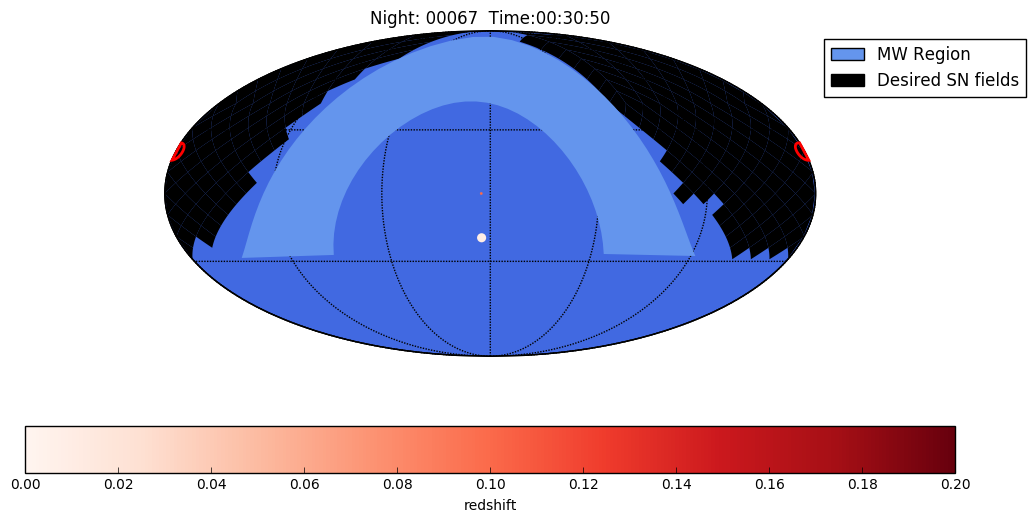

In [24]:
ra, dec, mjd, band = ourdf.loc[70, ['fieldRA', 'fieldDec', 'expMJD', 'filter']]
fig, ax, m, xx = ztfsky.generate_image(np.degrees(ra), np.degrees(dec), 4., 
                                mjd, band=band, mwColor='cornflowerblue',
                                alpha=1.0,
                                sndf=simsdf, bg_color='royalblue',
                                surveystart=df.expMJD.min(),
                                loc='best')

## Generate Multiple images conveniently

In [25]:
import logging
logging.basicConfig(filename='multiImage.log', level=logging.INFO)

In [ ]:
!rm ztf_obsHistID_03*.png 

In [26]:
import matplotlib.pyplot as plt

In [27]:
ourdf[['expMJD', 'filter']].query('expMJD > 58181 and expMJD < 58190')

,expMJD,filter
night,,
63,58181.167442,r
64,58182.126833,g
65,58183.126940,g
66,58184.126045,r
67,58185.127107,g
68,58186.126934,g
70,58188.354745,r
71,58189.168627,g


In [28]:
len(ourdf)

43

In [29]:
ourdf.query('expMJD > 58172 and expMJD < 58174')

,sessionID,propID,fieldID,fieldRA,fieldDec,filter,expDate,expMJD,visitTime,visitExpTime,...,rawSeeing,wind,humidity,slewDist,slewTime,fiveSigmaDepth,ditheredRA,ditheredDec,totalRequestsTonight,metricValue
night,,,,,,,,,,,,,,,,,,,,,
55,0,2,509,1.249937,0.205076,r,4762932,58173.126536,30.0,30.0,...,NaN,NaN,NaN,0.0,10.0,0.0,0.0,0.0,2,0.0


In [30]:
ztfsky.generate_var_scatter(58173.12, 'r', simsdf)

,dec,ra,t0,z,time,mag,x0,area
0,-20.0,5.0,58185.0,0.01,-11.88,15.452444,0.041904,27.427824
1,0.0,5.0,58185.0,0.10,-11.88,20.250332,0.000369,2.012334
2,20.0,5.0,58185.0,0.20,-11.88,21.568484,0.000081,0.000000


In [31]:
ztfsky.generate_images_from(ourdf.index.values, ourdf, rootname='scalingTest_', 
                            snsims=simsdf, savefig=True)

/Users/rbiswas/.local/lib/python2.7/site-packages/sncosmo-1.6.dev0-py2.7-macosx-10.6-x86_64.egg/sncosmo/models.py:187: RuntimeWarning: divide by zero encountered in log10
  result[i] = -2.5 * np.log10(f / zpf)


In [32]:
!ls -ltr

total 25456
-rw-r--r--@ 1 rbiswas  staff   85895 Nov 10 12:55 day_1.png
-rw-r--r--@ 1 rbiswas  staff  109050 Nov 10 12:55 day_16.png
-rw-r--r--@ 1 rbiswas  staff  113183 Nov 11 17:01 ztf_obsHistID_000001.png
-rw-r--r--@ 1 rbiswas  staff  113017 Nov 11 17:02 ztf_obsHistID_000002.png
-rw-r--r--@ 1 rbiswas  staff  112706 Nov 11 17:02 ztf_obsHistID_000003.png
-rw-r--r--@ 1 rbiswas  staff  112495 Nov 11 17:02 ztf_obsHistID_000004.png
-rw-r--r--  1 rbiswas  staff    5555 Nov 12 22:15 Untitled.ipynb
-rw-r--r--  1 rbiswas  staff   99419 Nov 13 13:59 Demo_ztf_visibleFields.ipynb
-rw-r--r--  1 rbiswas  staff  367158 Nov 13 13:59 Demo_ztf_camera.ipynb
-rw-r--r--  1 rbiswas  staff  311771 Nov 13 13:59 Demo_testMW.ipynb
-rw-r--r--@ 1 rbiswas  staff  134085 Nov 13 14:11 colorcoded.png
-rw-r--r--@ 1 rbiswas  staff  147883 Nov 13 14:18 ztf_obsHistID_030000.png
-rw-r--r--@ 1 rbiswas  staff  147977 Nov 13 14:18 ztf_obsHistID_030001.png
-rw-r--r--@ 1 rbiswas  staff  148330 Nov 13 14:19 ztf_obsHistID_0300

In [ ]:
!open ztf_obsHistID_030000.png

# Scratch

In [ ]:
ztfsky = ZTFSNViz(showMW=False)
fig, ax, m = ztfsky.generate_image_bg(mwfill=False, lw=5., mwcolor='k')

In [ ]:
ra = [-30, 30, 30, -30]
dec = [-30, -30, 30, 30]
x, y = m(ra, dec)

In [ ]:
from matplotlib.patches import Polygon

In [ ]:
p = Polygon(zip(x,y), fill=False, color='k', alpha=1.,
            **dict(edgecolor='w', lw=5))

In [ ]:
ax.add_patch(p)

In [ ]:
p.get_lw()

In [ ]:
fig